## Lab 5 - Revenge of the Pendulum
### PHYS 163 - Prof. Marshall

***

In the last lab, we measured the force applied to a spring, along with its extension.  Making a plot of $F$ vs. $\Delta x$, we fit the data with a straight line, which represented the spring constant $k$.

But how can we be sure that the data are best fit by a linear function?  What if we want to fit our data with any function?  And besides plotting the residuals, can we get a numerical value that describes the goodness of fit?  And what about uncertainties on our fit parameters?

In this lab, we will answer all of those questions.

### Data Collection

We will once again be using the pendulum, with a small mass attached to one end.

* With the pendulum hanging straight down, place one end of the meter stick directly under the pendulum.  Adjust the pendulum's height so that it just clears the meter stick when swinging.

* Pull the pendulum back to an amplitude of 70 cm, as measured on the meter stick.  Release it.

* When the amplitude decreases to 60 cm, begin recording the amplitude for *every other swing* until you get a total of 10 data points.

* You should also record the uncertainty for each measurement.  The uncertainty will depend on your ability to accurately read the meter stick while the pendulum is swinging, and thus will be much larger than 0.1 cm.  Note that the uncertainty does not need to be the same for each data point!  As the amplitude decreases, the pendulum moves more slowly and therefore your measurements may become more accurate.

### Data Analysis

* Make a plot of amplitude vs. swing number for your data.  To generate a plot with error bars, we can use the following method:

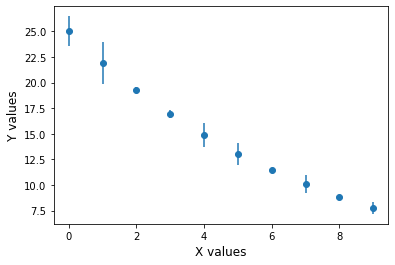

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# First generate some fake data and error bars (you will use your data here)
np.random.seed(1)
x = np.arange(10)
y = 25. * np.exp(-0.13*x) + 0.01*np.random.randn(10)
deltay = np.random.randn(10)

# Now make a plot with error bars
plt.errorbar(x,y,yerr=deltay,fmt='o')
plt.xlabel('X values',fontsize='large')
plt.ylabel('Y values',fontsize='large')
plt.show()

* Fit your data with a straight line, as we did in the Hooke's Law lab.  Just examining your data by eye, do they appear to be well fit by a straight line?  Does the best-fit line pass through all of the points w/ error bars?

* Make a plot of the residuals, as we did in the Hooke's Law lab.  Do you see any systematic trends with the residuals, or are they randomly scattered around zero?  How does the size of the residuals compare to the size of your uncertainties?

Given the above, how can we judge more precisely whether the data are best fit by a straight line?  We can calculate what's called the chi-square ($\chi^2$) statistic, which measures the average deviation of the data from a given function.

To calculate $\chi^2$, we can use the following equation:

$$ \chi^2 = \Sigma \frac{(O_{\rm i} - E_{\rm i})^2}{E_{\rm i}} $$

Here $E_{\rm i}$ are the expected values (from our best-fit model) and $O_{\rm i}$ are the observed values.  Essentially we are calculating how far away each data point is from the model, then squaring it (because we don't care about whether it's above or below the best fit line).  Then we divide by the expected value, and add them all up.  Don't forget that if you have a `numpy` array (let's call it `a`) you can add up all the elements using `a.sum()`

* Calculate the $\chi^2$ value for your straight line fit.  The smaller $\chi^2$ is, the better our fit.  We will compare $\chi^2$ for a linear fit with an exponential function below.

#### Fitting an arbitrary function

If a straight line isn't a good fit, how can we fit another function?  To do that we use a module from the `scipy` library, which contains many scientific and mathematical functions.

There are two parts:  first, we must define a function which represents the mathematical function we are trying to fit.  Then, we run `scipy.optimize.curve_fit` to fit our data.

Let's try using an exponential function on our data above. It probably won't fit very well, but that's ok.

In [2]:
from scipy.optimize import curve_fit

def f(x,a,b,c):
    return a * np.exp(-b*x) + c

popt, pcov = curve_fit(f,x,y)

Above, the function `f` takes a value (or array) `x` as input, and returns $a e^{-bx}+c$.

After `curve_fit` runs, it returns two things:  the array `popt` which contains the best-fit parameters, and `pcov` which contains the covariance matrix.  Don't worry about the details of that one, but we can use it to get the uncertainties on our fit parameters.

First, let's take a look at our fit parameters:

In [3]:
popt

array([24.9452462 ,  0.13062592,  0.06385551])

The parameters are in the same order as our function.  So the first value represents `a`, the second value is `b`, and the third value is `c`.

**Note:** if `curve_fit` returns an error, it might not be able to fit your data.  In that case, we can help it out by placing bounds on the best-fit parameters.

In [4]:
popt, pcov = curve_fit(f,x,y,bounds=(0,[30.,1.,1.]))

Here, we place boundaries that limit $0 < a < 30$, $0 < b < 1$, and $0 < c < 1$.  These values can be inferred based on our plot.

Let's make a new plot based on our best-fit parameters:

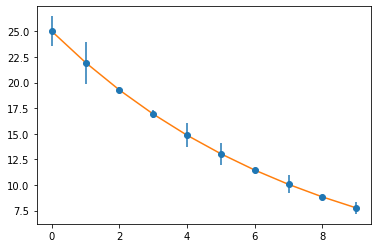

In [5]:
plt.errorbar(x,y,yerr=deltay,fmt='o')
plt.plot(x,f(x,*popt),'-')
plt.show()

In the command to plot our trendline, we took the original function `f` and fed it our best-fit parameters `popt`.  Because `popt` contains more than one value, we need to place an asterisk in front:  `*popt`

What about the uncertainties on our fit parameters?  Let's take a look at the `pcov` object that gets returned:

In [6]:
pcov

array([[ 4.21898085e-03, -3.88516428e-05, -4.50445042e-03],
       [-3.88516428e-05,  3.90968763e-07,  4.31824979e-05],
       [-4.50445042e-03,  4.31824979e-05,  4.91387137e-03]])

This is what's known as the covariance matrix, and it tells us how much one parameter depends on another.  Taking the diagonal of this matrix gives us the variance of each paramter individually, and then taking the square root gives us the uncertainty.

In [7]:
np.sqrt(np.diag(pcov))

array([0.06495368, 0.00062527, 0.07009901])

Let's remind ourselves of what the best-fit parameters were:

In [8]:
popt

array([24.94524561,  0.13062593,  0.06385615])

So our exponential function would have a coefficient of $a=24.95 \pm 0.07$, an exponent of $b=0.1306 \pm 0.0006$, and an offset of $c = 0.06 \pm 0.07$.

Ok, back to your data:

* Fit your data with an exponential function, similar to above.

* Make a plot of your data points with the exponential trendline.

* Make a plot of the residuals.  How do they compare with the residuals from a linear fit?  Are the residuals smaller than the measurement uncertainties?  Are there any systematic trends?

* Calculate the $\chi^2$ value for your data, based on an exponential fit.  Is the $\chi^2$ value lower than the linear trendline?

#### To be submitted with your lab report:

* Data (w/ uncertainties) for the pendulum

For **both** the linear fit and the exponential fit you should include:

* Plot of the data (w/ error bars) and the best-fit trendline

* Residuals plot

* Calculation of $\chi^2$

* Discussion of which function provides a better fit